## HomeWork 1 Due at Mid-night 9/16/2019

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading MPG dataset ##

In [3]:
mpg = pd.read_csv("mpg2.csv")
print(mpg.shape)
mpg.head()

(400, 9)


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

## Question 1. Check if there are any null or NA

**Type in your code here**

In [4]:
mpg.isnull().values.any()

True

## Question 2. Remove any rows that has null or NA

**Type in your code here**

In [5]:
mpg = mpg.dropna()

In [6]:
mpg.isnull().values.any()

False

## Question 3. Check if there is any outliers in the mpg field

**Type in your code here**

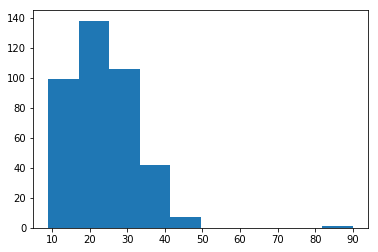

In [7]:
plt.hist(mpg['mpg'].values)
plt.show()

In [8]:
mpg.shape

(393, 9)

**There is one data ...**

## Question 4. Display and then Remove the one outlier row. You should now have 392 rows

**Type in your code here**

In [9]:
for i in mpg.itertuples():
    if i.mpg == 90.0:
        print(i)
        mpg = mpg.drop(i.Index)
    
mpg.shape

Pandas(Index=9, mpg=90.0, cylinders=8, displacement=451.0, horsepower=450.0, weight=2555, acceleration=8.0, model_year=2020, origin='usa', name='tesla model Y')


(392, 9)

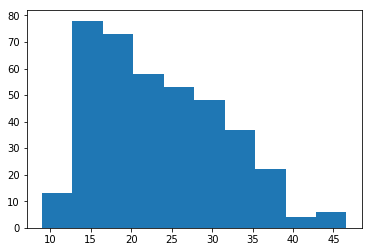

In [10]:
plt.hist(mpg['mpg'].values)
plt.show()

## Question 5. Calculate the average acceleration cars made in usa using SQL

**Type in your code here**

In [11]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
q = """
SELECT AVG(acceleration) as average_acceleration, origin FROM mpg
WHERE origin = 'usa'
"""
print(pysqldf(q))

   average_acceleration origin
0             14.990204    usa


## Question 6. Calculate the average horsepower for each country using SQL

In [12]:
q = """
SELECT AVG(horsepower) as usa_average_horsepower, origin FROM mpg
WHERE origin = 'usa'
"""
print(pysqldf(q))

q = """
SELECT AVG(horsepower) as japan_average_horsepower, origin FROM mpg
WHERE origin = 'japan'
"""
print(pysqldf(q))

q = """
SELECT AVG(horsepower) as europe_average_horsepower, origin FROM mpg
WHERE origin = 'europe'
"""
print(pysqldf(q))

   usa_average_horsepower origin
0               119.04898    usa
   japan_average_horsepower origin
0                 79.835443  japan
   europe_average_horsepower  origin
0                  80.558824  europe


## Question 7. Calculate the number of occurrences, mean, min, max of the weight for each country using SQL

**Type in your code here**

In [13]:
q = """
SELECT weight, origin, COUNT(weight) as total_weight, AVG(weight) as mean_weight, MIN(weight) as minimum_weight, MAX(weight) as max_weight from mpg
WHERE origin = 'usa'
"""
print(pysqldf(q))

q = """
SELECT weight, origin, COUNT(weight) as total_weight, AVG(weight) as mean_weight, MIN(weight) as minimum_weight, MAX(weight) as max_weight from mpg
WHERE origin = 'europe'
"""
print(pysqldf(q))

q = """
SELECT weight, origin, COUNT(weight) as total_weight, AVG(weight) as mean_weight, MIN(weight) as minimum_weight, MAX(weight) as max_weight from mpg
WHERE origin = 'japan'
"""
print(pysqldf(q))

   weight origin  total_weight  mean_weight  minimum_weight  max_weight
0    5140    usa           245  3372.489796            1800        5140
   weight  origin  total_weight  mean_weight  minimum_weight  max_weight
0    3820  europe            68  2433.470588            1825        3820
   weight origin  total_weight  mean_weight  minimum_weight  max_weight
0    2930  japan            79  2221.227848            1613        2930


## Question 8. Answer Question 7 but use Pandas functions

**Type in your code here**

In [14]:
usa = mpg[mpg.origin == 'usa']
europe = mpg[mpg.origin == 'europe']
japan = mpg[mpg.origin == 'japan']

In [15]:
usa['weight'].describe()

count     245.000000
mean     3372.489796
std       795.346690
min      1800.000000
25%      2720.000000
50%      3381.000000
75%      4055.000000
max      5140.000000
Name: weight, dtype: float64

In [16]:
europe['weight'].describe()

count      68.000000
mean     2433.470588
std       491.813867
min      1825.000000
25%      2071.750000
50%      2240.000000
75%      2803.750000
max      3820.000000
Name: weight, dtype: float64

In [17]:
japan['weight'].describe()

count      79.000000
mean     2221.227848
std       320.497248
min      1613.000000
25%      1985.000000
50%      2155.000000
75%      2412.500000
max      2930.000000
Name: weight, dtype: float64

## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the horsepower, weight and accleartion for each country

**Type in your code here**

In [18]:
usa[['horsepower','weight', 'acceleration']].kurt()

horsepower     -0.189521
weight         -0.965494
acceleration   -0.142774
dtype: float64

In [19]:
usa[['horsepower','weight', 'acceleration']].std()

horsepower       39.89779
weight          795.34669
acceleration      2.73602
dtype: float64

In [20]:
usa[['horsepower','weight', 'acceleration']].skew()

horsepower      0.763248
weight          0.067009
acceleration    0.098737
dtype: float64

In [21]:
japan[['horsepower','weight', 'acceleration']].kurt()

horsepower     -0.131696
weight         -0.380625
acceleration   -0.528450
dtype: float64

In [22]:
japan[['horsepower','weight', 'acceleration']].std()

horsepower       17.819199
weight          320.497248
acceleration      1.954937
dtype: float64

In [23]:
japan[['horsepower','weight', 'acceleration']].skew()

horsepower      0.660375
weight          0.498497
acceleration    0.042795
dtype: float64

In [24]:
europe[['horsepower','weight', 'acceleration']].std()

horsepower       20.157871
weight          491.813867
acceleration      3.087813
dtype: float64

In [25]:
europe[['horsepower','weight', 'acceleration']].kurt()

horsepower     -0.059514
weight         -0.249813
acceleration    0.036290
dtype: float64

In [26]:
europe[['horsepower','weight', 'acceleration']].skew()

horsepower      0.472850
weight          0.812081
acceleration    0.945656
dtype: float64

## Question 10. How would you describe the acceleration distribution for different country based on the Skew?

** The acceleration distribution for europe seems to be positively skewed, japan seems to be symmetric, usa also seems to be symmetric **

## Question 11. How would you describe the acceleration distribution for different country based on Kurotsis?

** The acceleration distribution for europe seems to be leptokurtic, but both japan and usa seem to be platykurtic**

## Question 12. Plot the histogram of acceleration distribution for different country

**Type in your code here**

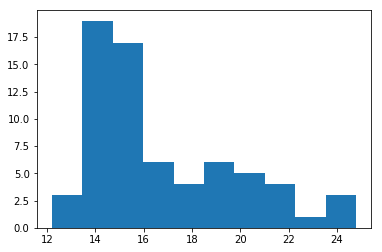

In [27]:
plt.hist(europe[['acceleration']].values)
plt.show()

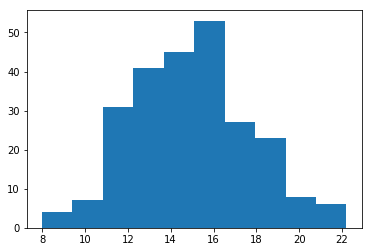

In [28]:
plt.hist(usa[['acceleration']].values)
plt.show()

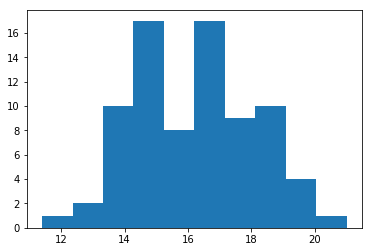

In [29]:
plt.hist(japan[['acceleration']].values)
plt.show()

## Question 13. Calculate correlation of all the factors among themselves

**Type in your code here**

In [30]:
usa.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.824524     -0.834628   -0.751570 -0.846424   
cylinders    -0.824524   1.000000      0.933885    0.827646  0.881609   
displacement -0.834628   0.933885      1.000000    0.902744  0.917588   
horsepower   -0.751570   0.827646      0.902744    1.000000  0.838450   
weight       -0.846424   0.881609      0.917588    0.838450  1.000000   
acceleration  0.377239  -0.563293     -0.619890   -0.719191 -0.440230   
model_year    0.648641  -0.463986     -0.497591   -0.495009 -0.406388   

              acceleration  model_year  
mpg               0.377239    0.648641  
cylinders        -0.563293   -0.463986  
displacement     -0.619890   -0.497591  
horsepower       -0.719191   -0.495009  
weight           -0.440230   -0.406388  
acceleration      1.000000    0.380878  
model_year        0.380878    1.000000

In [31]:
europe.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.271719     -0.495594   -0.679575 -0.512011   
cylinders    -0.271719   1.000000      0.657791    0.392653  0.574767   
displacement -0.495594   0.657791      1.000000    0.622043  0.891560   
horsepower   -0.679575   0.392653      0.622043    1.000000  0.611619   
weight       -0.512011   0.574767      0.891560    0.611619  1.000000   
acceleration  0.298047   0.024453      0.038032   -0.544388  0.166325   
model_year    0.504231   0.262851      0.206940   -0.132330  0.178178   

              acceleration  model_year  
mpg               0.298047    0.504231  
cylinders         0.024453    0.262851  
displacement      0.038032    0.206940  
horsepower       -0.544388   -0.132330  
weight            0.166325    0.178178  
acceleration      1.000000    0.175077  
model_year        0.175077    1.000000

In [32]:
japan.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.139788     -0.366020   -0.673095 -0.564106   
cylinders    -0.139788   1.000000      0.720992    0.431770  0.489184   
displacement -0.366020   0.720992      1.000000    0.730176  0.841430   
horsepower   -0.673095   0.431770      0.730176    1.000000  0.867589   
weight       -0.564106   0.489184      0.841430    0.867589  1.000000   
acceleration  0.401114  -0.219675     -0.535590   -0.720149 -0.567682   
model_year    0.568662   0.085985      0.120835   -0.215264  0.045365   

              acceleration  model_year  
mpg               0.401114    0.568662  
cylinders        -0.219675    0.085985  
displacement     -0.535590    0.120835  
horsepower       -0.720149   -0.215264  
weight           -0.567682    0.045365  
acceleration      1.000000   -0.000944  
model_year       -0.000944    1.000000

## Question 14. Which factors (cylinders, horsepower or weight) will affect your mileage the most based on correlation?

**The horsepower seems to be the factor that affects your mileage the most since it's lower than weight and cylinders**

## Question 15. Does the result depend on the country? If yes, how?

**Yes, in usa the factor that affects it the most is not horsepower, but is actually the weight**